### Libaries

In [1]:
# import nessary libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### EDA

In [2]:
windMillDF = pd.read_csv('../dataset/train.csv')
windMillDF['tracking_id'] = windMillDF['tracking_id'].astype('str')
windMillDF['datetime'] = pd.to_datetime(windMillDF['datetime'])
windMillDF

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934
28196,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195
28197,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,43.576510,534.209913,1951.728713,88.319152,D,Medium,NaN,0.380264,28.533850,11.096599
28198,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,44.973415,568.504898,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239


In [3]:
windMillDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tracking_id                     28200 non-null  object        
 1   datetime                        28200 non-null  datetime64[ns]
 2   wind_speed(m/s)                 27927 non-null  float64       
 3   atmospheric_temperature(°C)     24750 non-null  float64       
 4   shaft_temperature(°C)           28198 non-null  float64       
 5   blades_angle(°)                 27984 non-null  float64       
 6   gearbox_temperature(°C)         28199 non-null  float64       
 7   engine_temperature(°C)          28188 non-null  float64       
 8   motor_torque(N-m)               28176 non-null  float64       
 9   generator_temperature(°C)       28188 non-null  float64       
 10  atmospheric_pressure(Pascal)    25493 non-null  float64       
 11  ar

In [4]:
# 找出數值欄位和類別欄位
numCols = [col for col in windMillDF.columns if windMillDF[col].dtype == 'float64']
catCols = [col for col in windMillDF.columns if windMillDF[col].dtype == 'object']
catCols.remove('tracking_id')

In [5]:
# 類別欄位的unique value
for col in catCols:
    nanCount = windMillDF[col].isnull().sum()
    print(f"{col} has {windMillDF[col].unique()} values, nan count: {nanCount} \n")

turbine_status has ['BA' 'A2' 'ABC' 'AAA' 'BD' 'AC' 'BB' 'BCB' 'B' 'AB' nan 'B2' 'BBB' 'A'
 'D'] values, nan count: 1759 

cloud_level has ['Medium' nan 'Low' 'Extremely Low'] values, nan count: 276 



In [6]:
# 將nan 設成other
windMillDF['turbine_status'] = windMillDF['turbine_status'].fillna('Other')
windMillDF['cloud_level'] = windMillDF['cloud_level'].fillna('Other')

In [7]:
# check nan
for col in catCols:
    nanCount = windMillDF[col].isnull().sum()
    print(f"{col} has {windMillDF[col].unique()} values, nan count: {nanCount} \n")

turbine_status has ['BA' 'A2' 'ABC' 'AAA' 'BD' 'AC' 'BB' 'BCB' 'B' 'AB' 'Other' 'B2' 'BBB'
 'A' 'D'] values, nan count: 0 

cloud_level has ['Medium' 'Other' 'Low' 'Extremely Low'] values, nan count: 0 



In [8]:
# 數值欄位的統計值
windMillDF[numCols].describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [9]:
# 找出數值欄位的nan值數量
for col in numCols:
    nanCount = windMillDF[col].isnull().sum()
    print(f"{col} nan count: {nanCount} \n")

wind_speed(m/s) nan count: 273 

atmospheric_temperature(°C) nan count: 3450 

shaft_temperature(°C) nan count: 2 

blades_angle(°) nan count: 216 

gearbox_temperature(°C) nan count: 1 

engine_temperature(°C) nan count: 12 

motor_torque(N-m) nan count: 24 

generator_temperature(°C) nan count: 12 

atmospheric_pressure(Pascal) nan count: 2707 

area_temperature(°C) nan count: 0 

windmill_body_temperature(°C) nan count: 2363 

wind_direction(°) nan count: 5103 

resistance(ohm) nan count: 1 

rotor_torque(N-m) nan count: 572 

blade_length(m) nan count: 5093 

blade_breadth(m) nan count: 0 

windmill_height(m) nan count: 543 

windmill_generated_power(kW/h) nan count: 207 



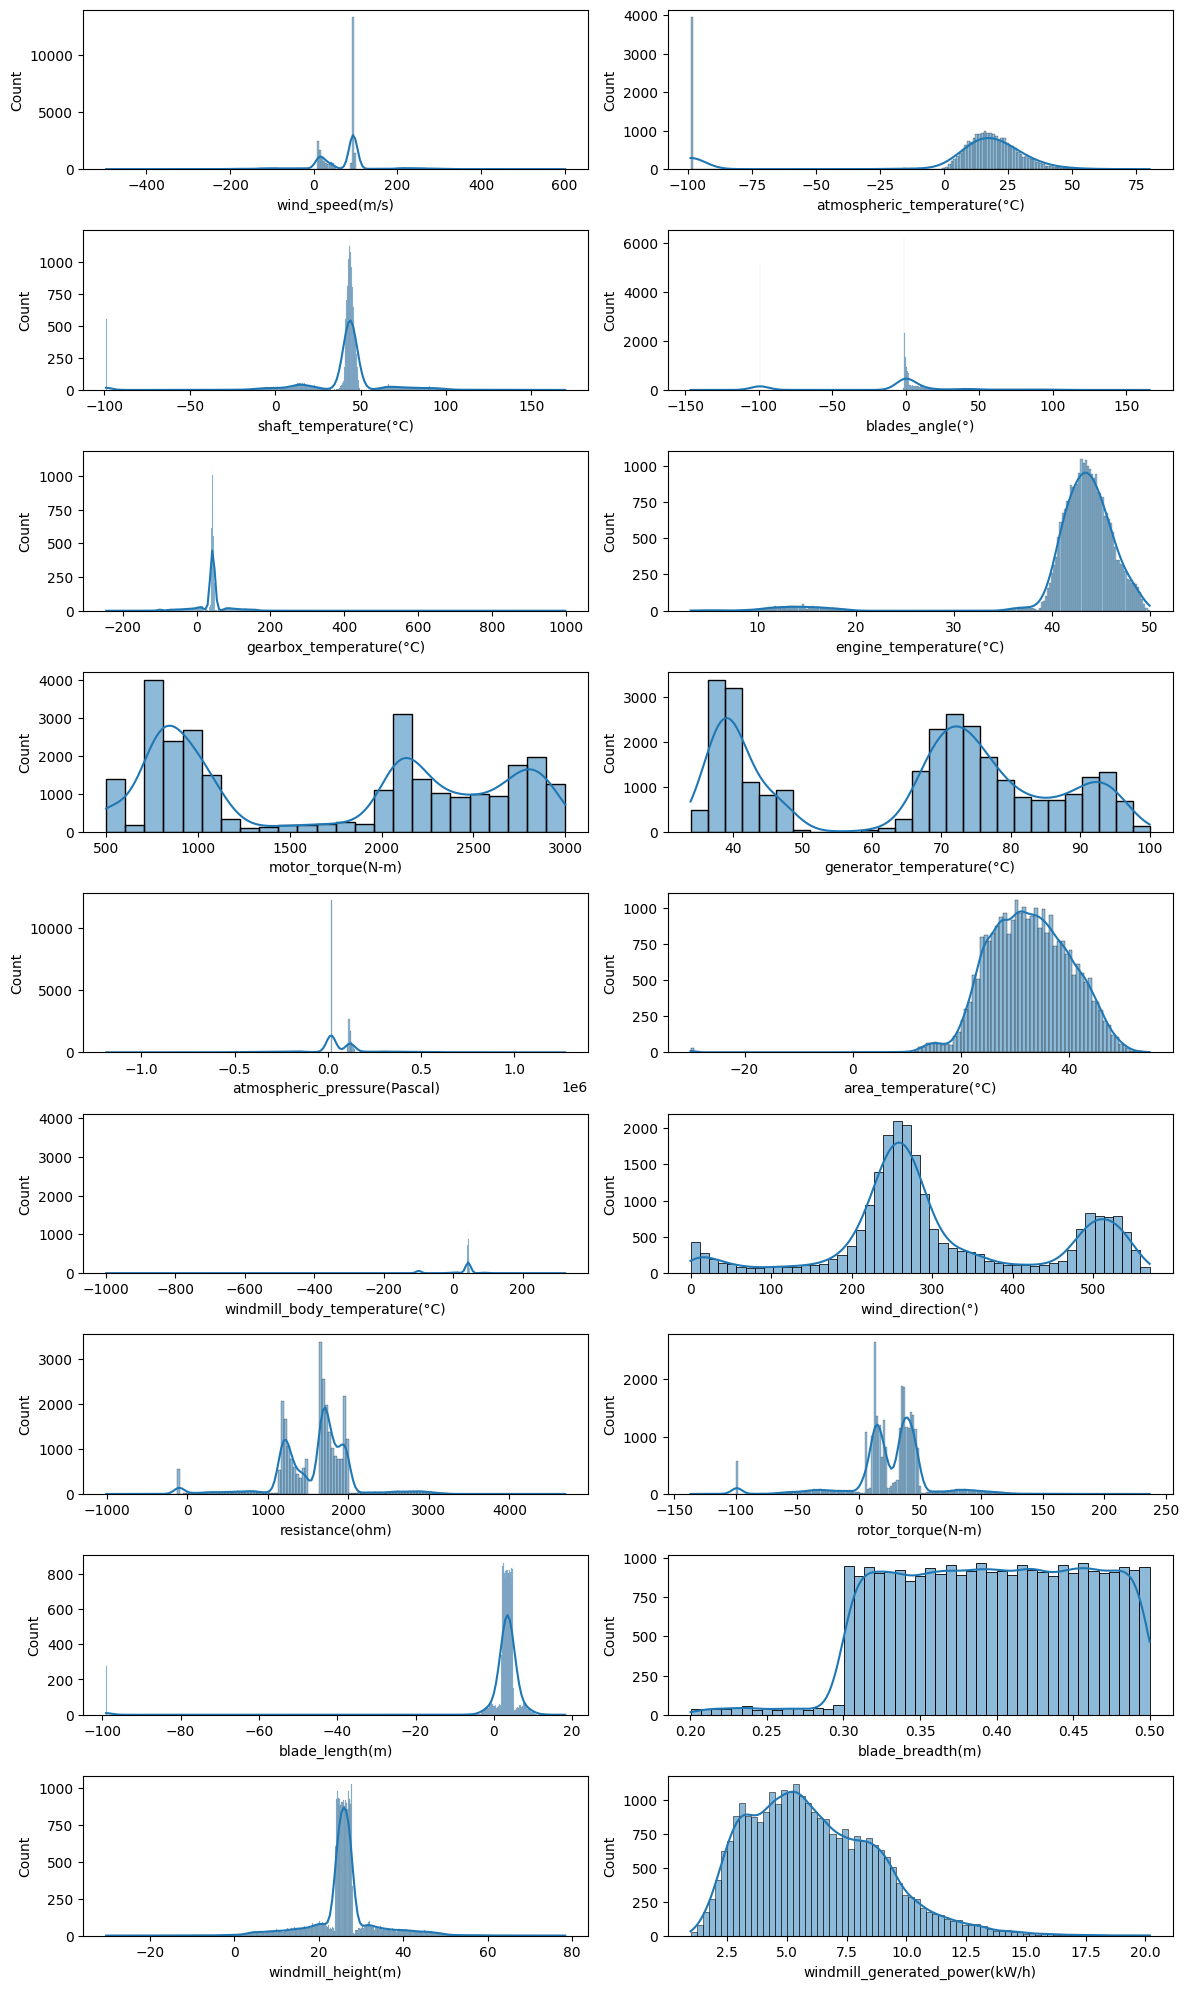

In [10]:
# 數值欄位個別分佈
plt.figure(figsize = (12, 20))
plotnumber = 1

for column in numCols:
    ax = plt.subplot(9, 2, plotnumber)
    sn.histplot(windMillDF[column], kde=True)
    plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

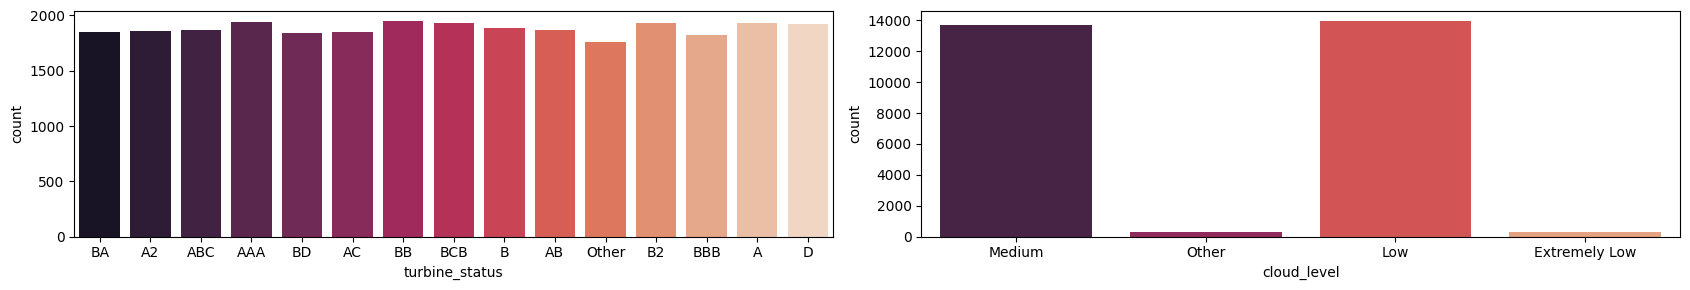

In [11]:
# 類別欄位個別分佈
plt.figure(figsize = (17, 3))
plotnumber = 1

for column in catCols:
    if plotnumber <= 11:
        ax = plt.subplot(1, 2, plotnumber)
        sn.countplot(x=column, hue=column, data=windMillDF, palette='rocket', legend=False)
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [12]:
# 轉換類別欄位to one-hot encoding
labelEncoder = LabelEncoder()

oneHotColumns = ['turbine_status', 'cloud_level']

windMillDF = pd.get_dummies(windMillDF, columns=oneHotColumns)
windMillDF.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,turbine_status_Other,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,cloud_level_Other
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,False,False,False,False,False,False,False,False,True,False
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,False,False,False,False,False,False,False,False,True,False
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,False,False,False,False,False,False,False,False,True,False
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,False,False,False,False,False,False,False,False,False,True
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,False,False,False,False,False,False,False,False,True,False


In [13]:
miceImputer = IterativeImputer(random_state=0)
windMillDfWithoutIdAndTime = windMillDF.drop(columns=['tracking_id', 'datetime'])

# use MICE to augment data
imputedWindMillData = miceImputer.fit_transform(windMillDfWithoutIdAndTime)

# change data to dataframe
imputedWindMillDf = pd.DataFrame(imputedWindMillData, columns=windMillDfWithoutIdAndTime.columns)
imputedWindMillDf['tracking_id'] = windMillDF['tracking_id']
imputedWindMillDf['datetime'] = windMillDF['datetime']
imputedWindMillDf

/Users/jim/anaconda3/envs/forTensorflow/lib/python3.9/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_BCB,turbine_status_BD,turbine_status_D,turbine_status_Other,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,cloud_level_Other,tracking_id,datetime
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,WM_33725,2019-08-04 14:33:20
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,WM_698,2018-11-05 10:13:20
2,95.484724,3.505572,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,WM_39146,2019-09-14 14:03:20
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,WM_6757,2018-12-25 15:33:20
4,10.722890,-5.402428,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,WM_21521,2019-05-04 03:13:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,WM_7814,2019-01-02 02:43:20
28196,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,WM_32512,2019-07-26 12:53:20
28197,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,WM_5193,2018-12-12 02:13:20
28198,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,WM_12173,2019-02-03 19:13:20


In [14]:
imputedWindMillDf.isnull().values.any()

False

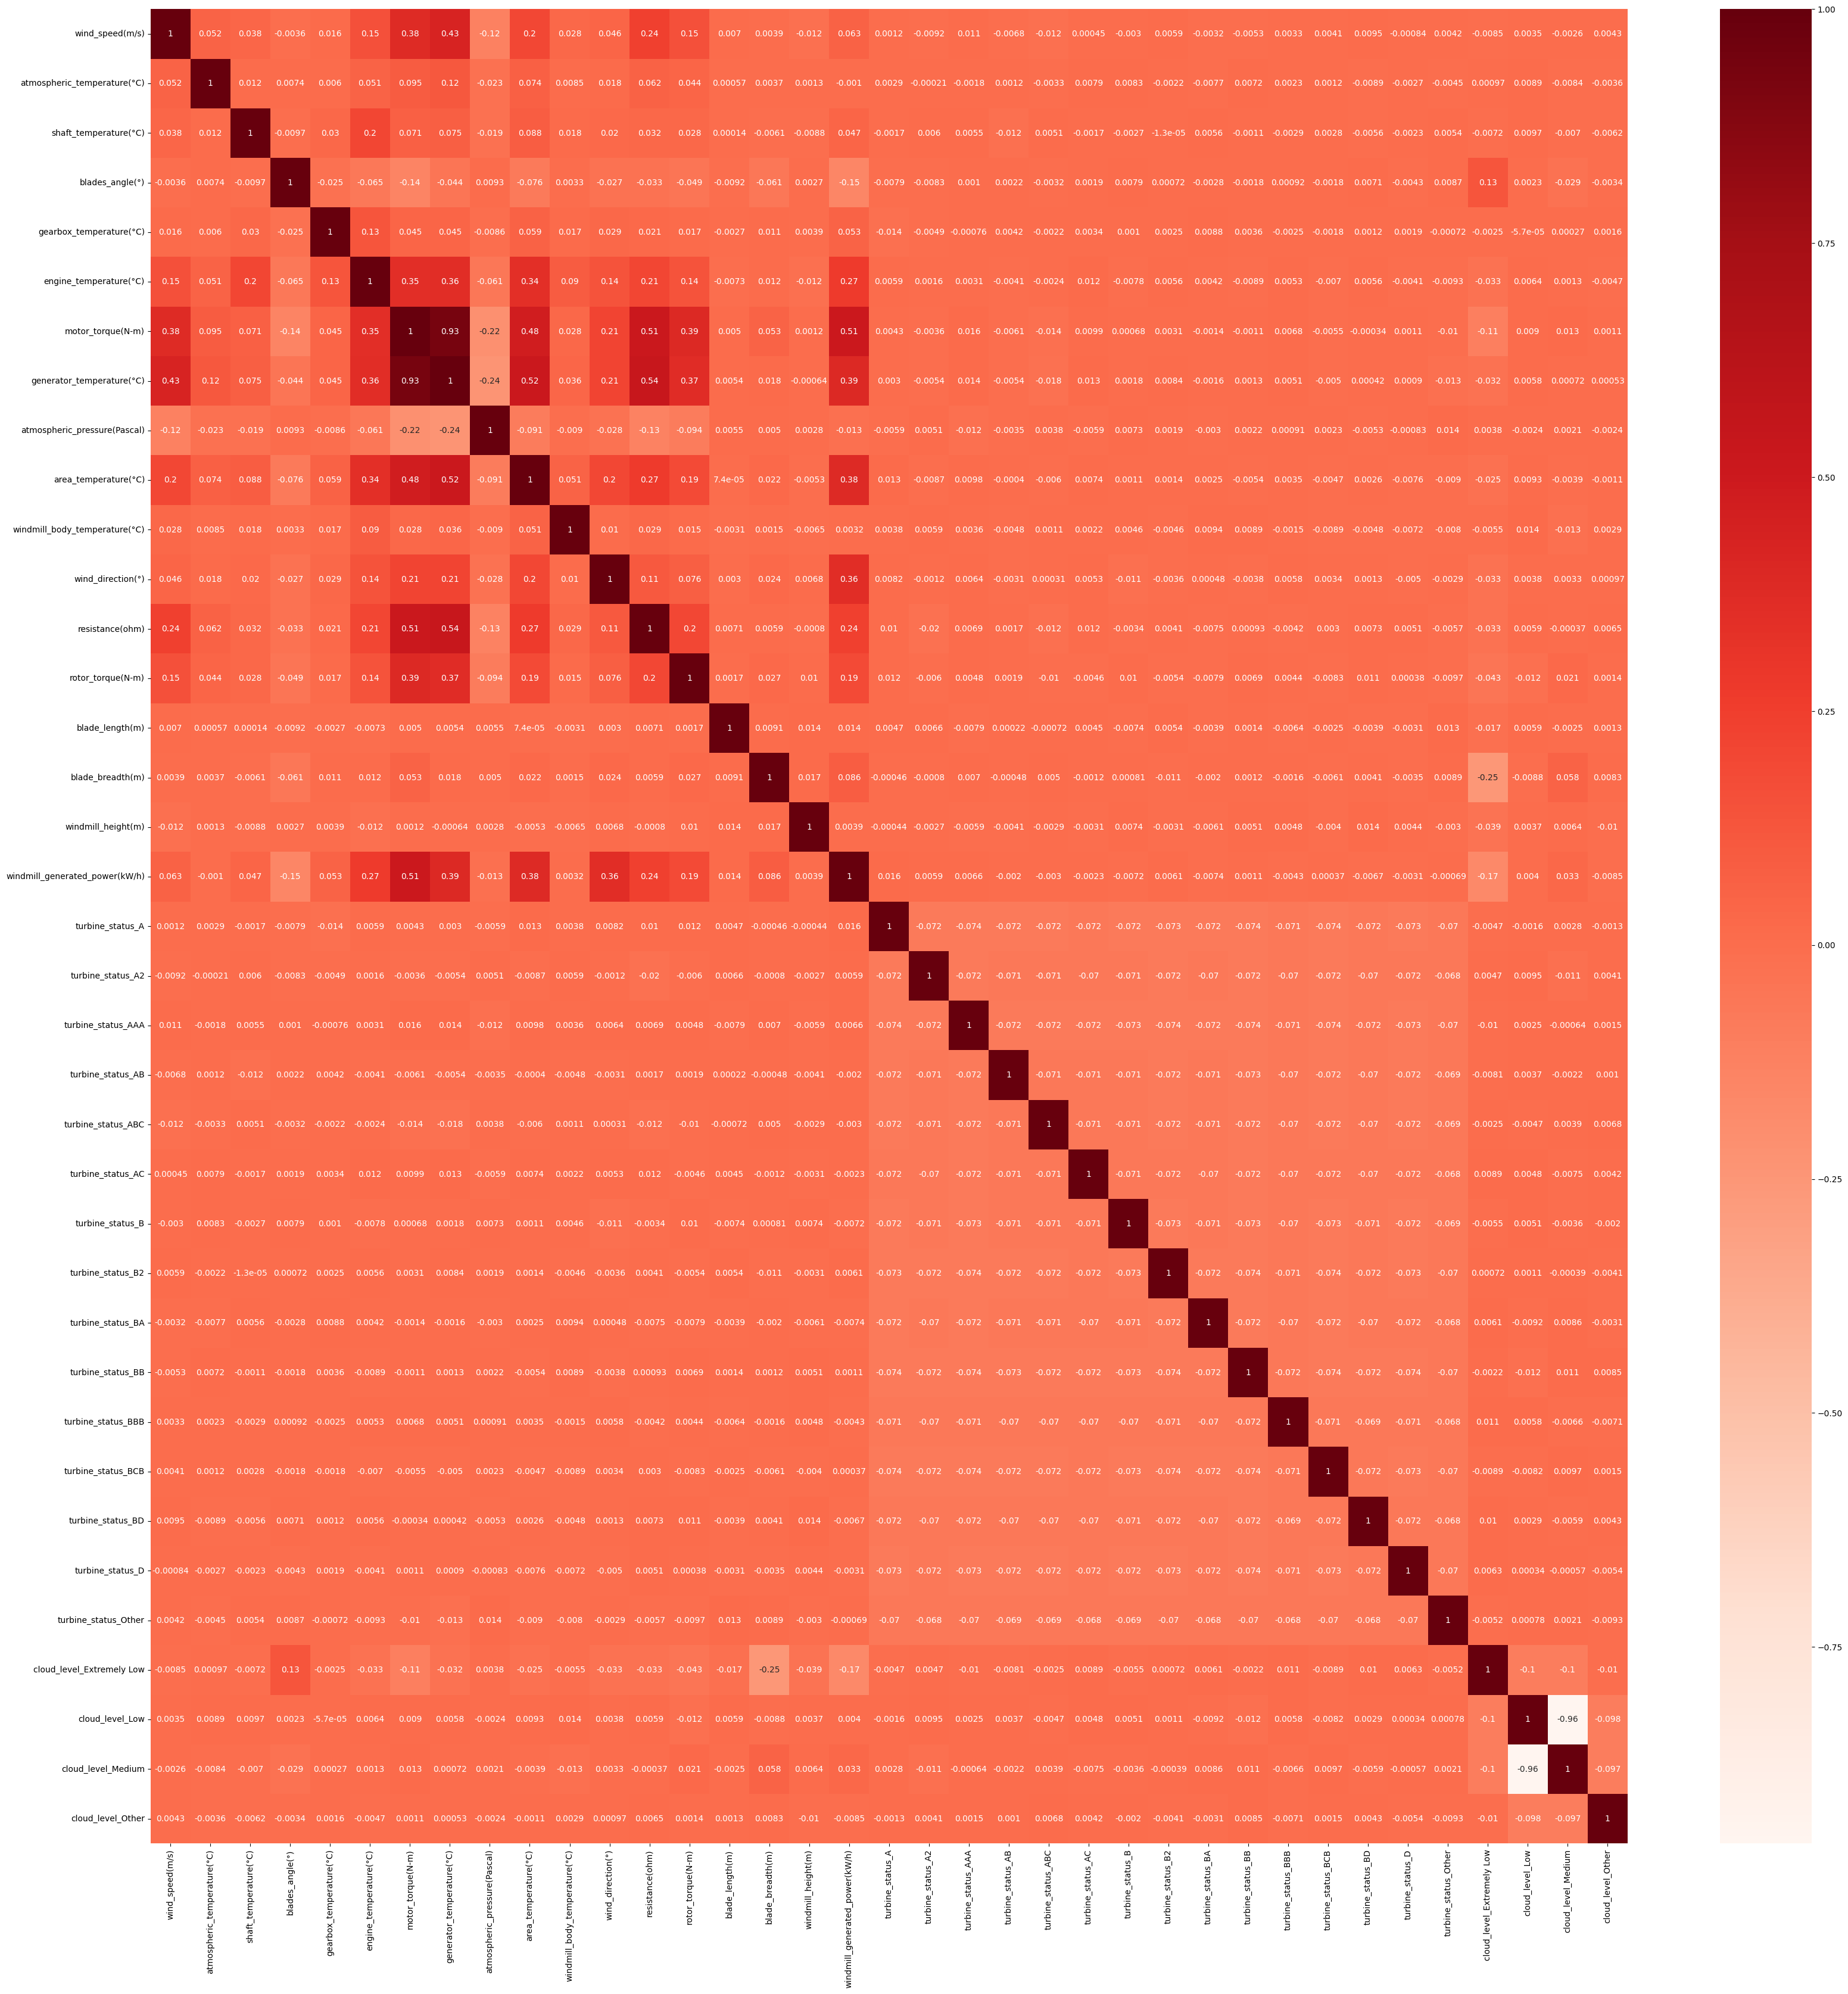



------------------------------------------------------------
motor_torque(N-m)                 0.505553
windmill_generated_power(kW/h)    1.000000
Name: windmill_generated_power(kW/h), dtype: float64
------------------------------------------------------------


In [15]:
# caculate correlation
windMillDfWithoutId = windMillDF.drop(['tracking_id', 'datetime'], axis=1)
correlation = windMillDfWithoutId.corr()

# heatmap
plt.figure(figsize=(40, 40))
sn.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

# find highly corrlate features
cor_target = abs(correlation["windmill_generated_power(kW/h)"])
relevant_features = cor_target[cor_target>0.5]

print('\n')
print('------------------------------------------------------------')
print(relevant_features)
print('------------------------------------------------------------')